# Table of Contents

- [Match Summary Dataset](#Match-Summary-Dataset)
	- [Data cleaning and transformation](#Data-cleaning-and-transformation)
- [Players Dataset](#Players-Dataset)
	- [Data Transformation](#Data-Transformation)
- [Batting Summary Dataset](#Batting-Summary-Dataset)
	- [Data cleaning and transformation](#Data-cleaning-and-transformation)
- [Bowling Summary Dataset](#Bowling-Summary-Dataset)
	- [Data Transformation](#Data-Transformation)
1. [Top 10 batsmen based on past 3 years total runs scored](#Top-10-batsmen-based-on-past-3-years-total-runs-scored)
	- [Result 1](#Result-1)
2. [Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)](#Top-10-batsmen-based-on-past-3-years-batting-average-min-60-balls-faced-in-each-season)
	- [Result 2](#Result-2)
3. [Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)](#Top-10-batsmen-based-on-past-3-years-strike-rate-min-60-balls-faced-in-each-season)
	- [Result 3](#Result-3)
4. [Top 10 bowlers based on past 3 years total wickets taken](#Top-10-bowlers-based-on-past-3-years-total-wickets-taken)
	- [Result 4](#Result-4)
5. [Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)](#Top-10-bowlers-based-on-past-3-yea.rs-bowling-average-min-60-balls-bowled-in-each-season)
	- [Result 5](#Result-5)
6. [Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)](#Top-10-bowlers-based-on-past-3-years-economy-rate-min-60-balls-bowled-in-each-season)
	- [Result 6](#Result-6)
7. [Top 5 batsmen based on past 3 years boundary % (fours and sixes)](#Top-5-batsmen-based-on-past-3-years-boundary--fours-and-sixes)
	- [Result 7](#Result-7)
8. [Top 5 bowlers based on past 3 years dot ball %](#Top-5-bowlers-based-on-past-3-years-dot-ball-)
	- [Result 8](#Result-8)
9. [Top 4 teams based on past 3 years winning %](#Top-4-teams-based-on-past-3-years-winning-)
	- [Result 9](#Result-9)
10. [Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years](#Top-2-teams-with-the-highest-number-of-wins-achieved-by-chasing-targets-over-the-past-3-years)
	- [Result 10](#Result-10)
- [Prediction](#Prediction)
	- [Orange cap player](#Orange-cap-player)
		- [Insight 1](#Insight-1)
	- [Purple cap player](#Purple-cap-player)
		- [Insight 2](#Insight-2)
	- [Top 4 qualifying teams](#Top-4-qualifying-teams)
		- [Insight 3](#Insight-3)
	- [Winner and runner-up](#Winner-and-runner-up)
		- [Insight 4](#Insight-4)
- [My pick](#My-pick)
	- [Pick your team selecting the Best 11 players based on their positions, 3 years performance data and additional research](#Pick-your-team-selecting-the-Best-11-players-based-on-their-positions-3-years-performance-data-and-additional-research)
		- [Insight 5](#Insight-5)
	- [Pick your top 3 all-rounders](#Pick-your-top-3-all-rounders)
		- [Insight 6](#Insight-6)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Match Summary Dataset

In [2]:
match = pd.read_csv('datasets/dim_match_summary.csv')

In [3]:
match.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,15-Oct-21,T203817
1,Capitals,KKR,KKR,3 wickets,13-Oct-21,T206442
2,RCB,KKR,KKR,4 wickets,11-Oct-21,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,10-Oct-21,T201819
4,Capitals,RCB,RCB,7 wickets,8-Oct-21,T205942


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


## Data cleaning and transformation

In [5]:
# convert match date from object to datetime 
match['matchDate'] = pd.to_datetime(match['matchDate'])

C:\Users\aly98\AppData\Local\Temp\ipykernel_29520\300476120.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  match['matchDate'] = pd.to_datetime(match['matchDate'])


In [6]:
# we will need one additional column of years in our analysis

match['years'] = match['matchDate'].dt.year

In [7]:
match.head()

,team1,team2,winner,margin,matchDate,match_id,years
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,2021
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,2021
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,2021


# Players Dataset

In [8]:
players = pd.read_csv('datasets/dim_players.csv')
players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


## Data Transformation

In [9]:
# fixing player Names
# Seperating first, middle(if avilable) and last name

names = players['name'].tolist()

flname = []

for names in names:
    for i, char in enumerate(names):
        if char.isupper() and i > 0:
            fname = names[:i]
            lname = names[i:]
            if lname[1:].islower():
                fullname = fname+' '+lname
                break
            else:
                for j, char2 in enumerate(lname):
                    if char2.isupper() and j > 0:
                        mname = lname[:j]
                        lname = lname[j:]
                        fullname = fname+' '+mname+' '+lname
                        break
            break
            
    flname.append(fullname)

players['name'] = flname

In [10]:
players.head(2)

,name,team,battingStyle,bowlingStyle,playingRole
0,Ruturaj Gaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,Fafdu Plessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter


In [11]:
players.isnull().sum()

name            0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
dtype: int64

In [12]:
players.duplicated().sum()

0

In [13]:
players[players['name']=='Rashid Khan']

,name,team,battingStyle,bowlingStyle,playingRole
64,Rashid Khan,Sunrisers,Right hand Bat,Legbreak Googly,Bowling Allrounder


# Batting Summary Dataset

In [14]:
batting = pd.read_csv('datasets/fact_bating_summary.csv')
batting.shape

(3268, 11)

In [15]:
batting.head(10)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
5,T203817,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25
6,T203817,Super Kings Vs KKR,KKR,3,NitishRana,out,0,1,0,0,0.00
7,T203817,Super Kings Vs KKR,KKR,4,SunilNarine,out,2,2,0,0,100.00
8,T203817,Super Kings Vs KKR,KKR,5,EoinMorgan,out,4,8,0,0,50.00
9,T203817,Super Kings Vs KKR,KKR,6,DineshKarthik,out,9,7,0,1,128.57


## Data cleaning and transformation

In [16]:
# fixing batsmenNames
# Seperating first, middle(if avilable) and last name

names = batting['batsmanName'].tolist()

flname = []

for names in names:
    for i, char in enumerate(names):
        if char.isupper() and i > 0:
            fname = names[:i]
            lname = names[i:]
            if lname[1:].islower():
                fullname = fname+' '+lname
                break
            else:
                for j, char2 in enumerate(lname):
                    if char2.isupper() and j > 0:
                        mname = lname[:j]
                        lname = lname[j:]
                        fullname = fname+' '+mname+' '+lname
                        break
            break
            
    flname.append(fullname)

batting['batsmanName'] = flname

In [17]:
batting.head(2)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,Ruturaj Gaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,Fafdu Plessis,out,86,59,7,3,145.76


In [18]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_id     3268 non-null   object
 1   match        3268 non-null   object
 2   teamInnings  3268 non-null   object
 3   battingPos   3268 non-null   int64 
 4   batsmanName  3268 non-null   object
 5   out/not_out  3268 non-null   object
 6   runs         3268 non-null   int64 
 7   balls        3268 non-null   int64 
 8   4s           3268 non-null   int64 
 9   6s           3268 non-null   int64 
 10  SR           3268 non-null   object
dtypes: int64(5), object(6)
memory usage: 281.0+ KB


In [19]:
# Convert SR from object to numerical data

batting['SR'] = pd.to_numeric(batting['SR'], errors='coerce')

In [20]:
batting['SR'].dtype

dtype('float64')

In [21]:
batting.isnull().sum()

match_id        0
match           0
teamInnings     0
battingPos      0
batsmanName     0
out/not_out     0
runs            0
balls           0
4s              0
6s              0
SR             54
dtype: int64

In [22]:
# Batsmen SRs are missing beacuse they didn't bat. fill with 0
batting['SR'].fillna(0,inplace=True)

In [23]:
batting['SR'].isnull().sum()

0

# Bowling Summary Dataset

In [24]:
bowling = pd.read_csv('datasets/fact_bowling_summary.csv')
bowling.sample(5)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
46,T205942,Capitals Vs RCB,RCB,GeorgeGarton,3.0,0,20,0,6.66,6,2,0,0,1
480,T205585,KKR Vs Royals,KKR,VarunChakravarthy,4.0,0,32,2,8.00,8,5,0,0,0
1400,T203456,Royals Vs RCB,Royals,YuzvendraChahal,4.0,0,15,2,3.75,12,1,0,0,0
1988,T204283,Royals Vs Super Kings,Super Kings,RavindraJadeja,4.0,0,32,1,8.00,6,2,1,1,0
901,T203087,KKR Vs Mumbai,KKR,SunilNarine,4.0,0,21,0,5.25,9,0,1,1,0


## Data Transformation

In [25]:
# fixing bowler Names
# Seperating first, middle(if avilable) and last name

names = bowling['bowlerName'].tolist()

flname = []

for names in names:
    for i, char in enumerate(names):
        if char.isupper() and i > 0:
            fname = names[:i]
            lname = names[i:]
            if lname[1:].islower():
                fullname = fname+' '+lname
                break
            else:
                for j, char2 in enumerate(lname):
                    if char2.isupper() and j > 0:
                        mname = lname[:j]
                        lname = lname[j:]
                        fullname = fname+' '+mname+' '+lname
                        break
            break
            
    flname.append(fullname)

bowling['bowlerName'] = flname

In [26]:
# Names fixed

bowling.head(2)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,Shakib Al Hasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,Shivam Mavi,4.0,0,32,1,8.0,8,1,2,0,0


In [27]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     2436 non-null   object 
 1   match        2436 non-null   object 
 2   bowlingTeam  2436 non-null   object 
 3   bowlerName   2436 non-null   object 
 4   overs        2436 non-null   float64
 5   maiden       2436 non-null   int64  
 6   runs         2436 non-null   int64  
 7   wickets      2436 non-null   int64  
 8   economy      2436 non-null   float64
 9   0s           2436 non-null   int64  
 10  4s           2436 non-null   int64  
 11  6s           2436 non-null   int64  
 12  wides        2436 non-null   int64  
 13  noBalls      2436 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 266.6+ KB


In [28]:
bowling.isnull().sum()

match_id       0
match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
dtype: int64

# 1. Top 10 batsmen based on past 3 years total runs scored

1. Find past 3 years batsman
2. Find top 10 batsman on total runs scored

In [29]:
# merge batting and match summary dataset to get Date

df = pd.merge(match,batting, on='match_id')

In [30]:
df.head()

,team1,team2,winner,margin,matchDate,match_id,years,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,1,Ruturaj Gaikwad,out,32,27,3,1,118.51
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,2,Fafdu Plessis,out,86,59,7,3,145.76
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,3,Robin Uthappa,out,31,15,0,3,206.66
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,4,Moeen Ali,not_out,37,20,2,3,185.00
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,KKR,1,Shubman Gill,out,51,43,6,0,118.60


In [31]:
player_years = df.groupby(['batsmanName'])['years'].nunique().reset_index()

In [32]:
# Whoever played in all three years(seasons) count is 3.

player_years

,batsmanName,years
0,A Bde Villiers,1
1,Aaron Finch,1
2,Abdul Basith,1
3,Abdul Samad,3
4,Abhijeet Tomar,1
...,...,...
259,Yash Dayal,1
260,Yash Dhull,1
261,Yashasvi Jaiswal,3
262,Yudhvir Singh,1


In [33]:
# include only past 3 years batsman name

player_all_years = player_years['batsmanName'][player_years['years']==3]

In [34]:
player_all_years

3            Abdul Samad
6        Abhishek Sharma
11         Aiden Markram
12        Ajinkya Rahane
17         Ambati Rayudu
             ...        
251          Virat Kohli
255    Wanindu Hasaranga
256    Washington Sundar
258      Wriddhiman Saha
261     Yashasvi Jaiswal
Name: batsmanName, Length: 82, dtype: object

In [35]:
# Only batting data of past 3 years players

batting_data = pd.merge(df,player_all_years,on= 'batsmanName', how='inner')
batting_data.shape

(2180, 17)

In [36]:
batting_data.head()

,team1,team2,winner,margin,matchDate,match_id,years,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,1,Ruturaj Gaikwad,out,32,27,3,1,118.51
1,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021,Capitals Vs Super Kings,Super Kings,1,Ruturaj Gaikwad,out,70,50,5,2,140.00
2,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,2021,Super Kings Vs Punjab Kings,Super Kings,1,Ruturaj Gaikwad,out,12,14,1,0,85.71
3,Super Kings,Capitals,Capitals,3 wickets,2021-10-04,T207682,2021,Super Kings Vs Capitals,Super Kings,1,Ruturaj Gaikwad,out,13,13,2,0,100.00
4,Super Kings,Royals,Royals,7 wickets,2021-10-02,T205672,2021,Super Kings Vs Royals,Super Kings,1,Ruturaj Gaikwad,not_out,101,60,9,5,168.33


In [37]:
top_batsmen = batting_data.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).reset_index()

## Result 1

In [38]:
top_batsmen.head(10)

,batsmanName,runs
0,Shubman Gill,1851
1,Fafdu Plessis,1831
2,Ruturaj Gaikwad,1593
3,K L Rahul,1516
4,Jos Buttler,1509
5,Shikhar Dhawan,1392
6,Virat Kohli,1385
7,Sanju Samson,1304
8,Suryakumar Yadav,1225
9,Glenn Maxwell,1214


#  2. Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

Average batting of those batsman minimum of 60 or more balls faced in each season (all 3 years)
1. First find players who faced 60 balls in each season
2. Then find top 10 based on average batting

In [39]:
# batsman who faced 60 or more in each season (year)

df1 = batting_data.groupby(['batsmanName', 'years'])['balls'].sum().reset_index()

In [40]:
df1.head()

,batsmanName,years,balls
0,Abdul Samad,2021,87
1,Abdul Samad,2022,7
2,Abdul Samad,2023,128
3,Abhishek Sharma,2021,69
4,Abhishek Sharma,2022,320


In [41]:
df1 = df1['batsmanName'][df1['balls']>=60]

In [42]:
df1

0           Abdul Samad
2           Abdul Samad
3       Abhishek Sharma
4       Abhishek Sharma
5       Abhishek Sharma
             ...       
241     Wriddhiman Saha
242     Wriddhiman Saha
243    Yashasvi Jaiswal
244    Yashasvi Jaiswal
245    Yashasvi Jaiswal
Name: batsmanName, Length: 156, dtype: object

In [43]:
# if batsmanName faced min of 60 balls in each season then count is 3 

df1 = df1.value_counts().reset_index()

In [44]:
df1.sample(5)

,batsmanName,count
42,Ajinkya Rahane,2
51,Lalit Yadav,2
28,Devdutt Padikkal,3
16,Shimron Hetmyer,3
20,Venkatesh Iyer,3


In [45]:
# select only players who faced 60 balls  in each season

df1 = df1['batsmanName'][df1['count']==3]

In [46]:
df1

0      Nicholas Pooran
1      M Shahrukh Khan
2       Marcus Stoinis
3       Mayank Agarwal
4            Moeen Ali
5      Abhishek Sharma
6          Nitish Rana
7         Prithvi Shaw
8       Quintonde Kock
9       Rahul Tripathi
10     Ravindra Jadeja
11         Riyan Parag
12        Rohit Sharma
13     Ruturaj Gaikwad
14        Sanju Samson
15      Shikhar Dhawan
16     Shimron Hetmyer
17         Shivam Dube
18        Shubman Gill
19    Suryakumar Yadav
20      Venkatesh Iyer
21         Virat Kohli
22     Wriddhiman Saha
23       Manish Pandey
24    Yashasvi Jaiswal
25      Dinesh Karthik
26        Ishan Kishan
27        Deepak Hooda
28    Devdutt Padikkal
29       Fafdu Plessis
30        David Miller
31       Glenn Maxwell
32       Andre Russell
33       Hardik Pandya
34       Ambati Rayudu
35         Jos Buttler
36           K L Rahul
37       Krunal Pandya
38       Aiden Markram
39        David Warner
Name: batsmanName, dtype: object

- Now we have all names of those batsman who played in each season and faced 60 or more balls in each season.
- let's merge these names with the original batting data, apply inner join to get only data of given names

In [47]:
# min 60 balls faced batsmen data

minBallsfaced = pd.merge(batting_data,df1, on='batsmanName', how='inner')

In [48]:
print(minBallsfaced.shape)
minBallsfaced.head()

(1498, 17)


,team1,team2,winner,margin,matchDate,match_id,years,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,1,Ruturaj Gaikwad,out,32,27,3,1,118.51
1,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021,Capitals Vs Super Kings,Super Kings,1,Ruturaj Gaikwad,out,70,50,5,2,140.00
2,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,2021,Super Kings Vs Punjab Kings,Super Kings,1,Ruturaj Gaikwad,out,12,14,1,0,85.71
3,Super Kings,Capitals,Capitals,3 wickets,2021-10-04,T207682,2021,Super Kings Vs Capitals,Super Kings,1,Ruturaj Gaikwad,out,13,13,2,0,100.00
4,Super Kings,Royals,Royals,7 wickets,2021-10-02,T205672,2021,Super Kings Vs Royals,Super Kings,1,Ruturaj Gaikwad,not_out,101,60,9,5,168.33


Now let's find Average batting (who faced min of 60 balls in each season)
- Average batting = total runs / total times out

In [49]:
# total times out

total_out = minBallsfaced[minBallsfaced['out/not_out']=='out'].groupby('batsmanName')['out/not_out'].value_counts().values

In [50]:
# Average batting = total runs / total out

Top_Avg_Batting = (minBallsfaced.groupby(['batsmanName'])['runs'].sum()/ total_out).sort_values(ascending=False)

In [51]:
Top_Avg_Batting.head(10)

batsmanName
K L Rahul           50.533333
Fafdu Plessis       43.595238
David Miller        43.200000
Jos Buttler         41.916667
Shimron Hetmyer     40.666667
Shubman Gill        40.239130
Shikhar Dhawan      39.771429
Ruturaj Gaikwad     37.928571
David Warner        37.900000
Suryakumar Yadav    35.000000
Name: runs, dtype: float64

In [52]:
Avg_Batting = Top_Avg_Batting.reset_index().rename(columns={'runs':'Avg_batting'})

In [53]:
Avg_Batting[Avg_Batting['batsmanName']=='Rashid Khan']

,batsmanName,Avg_batting


## Result 2

In [54]:
# Top 10 average batting of batsman from past 3 years and 60 balls faced in each season

result = Avg_Batting.head(10)
result

,batsmanName,Avg_batting
0,K L Rahul,50.533333
1,Fafdu Plessis,43.595238
2,David Miller,43.200000
3,Jos Buttler,41.916667
4,Shimron Hetmyer,40.666667
5,Shubman Gill,40.239130
6,Shikhar Dhawan,39.771429
7,Ruturaj Gaikwad,37.928571
8,David Warner,37.900000
9,Suryakumar Yadav,35.000000


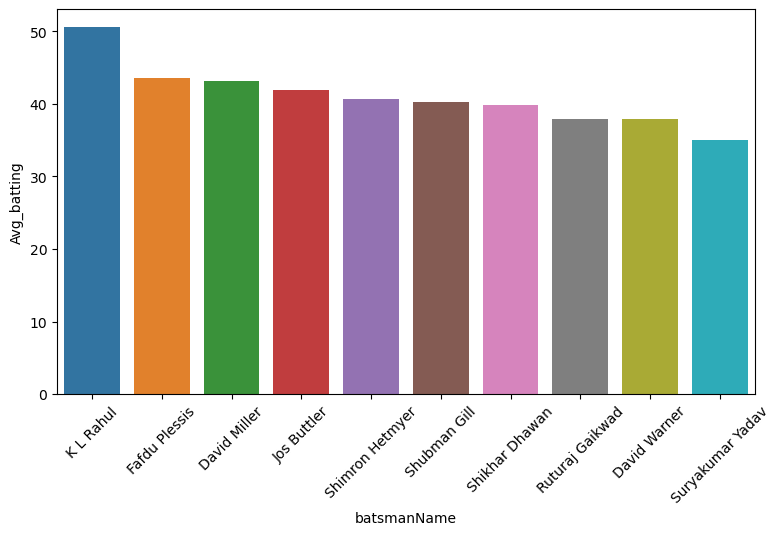

In [55]:
plt.figure(figsize=(9,5))
sns.barplot(data=result, x='batsmanName', y='Avg_batting')
plt.xticks(rotation=45)
plt.show()

# 3. Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

- Strike rate = (total runs / total balls)*100

In [56]:
runs = minBallsfaced.groupby(['batsmanName','years'])['runs'].sum()

In [57]:
balls = minBallsfaced.groupby(['batsmanName','years'])['balls'].sum()

In [58]:
sr = (runs / balls)*100

In [59]:
sr.loc['Fafdu Plessis']

years
2021    138.209607
2022    127.520436
2023    153.684211
dtype: float64

In [60]:
total_runs = minBallsfaced.groupby('batsmanName')['runs'].sum()

In [61]:
total_balls = minBallsfaced.groupby('batsmanName')['balls'].sum()

In [62]:
batting_sr = (total_runs / total_balls)*100

In [63]:
# top 10 batsman Strike Rate from past 3 years

batting_sr = batting_sr.reset_index().rename(columns={0:'strike_rate'})

## Result 3

In [64]:
batting_sr.sort_values(by= 'strike_rate',ascending=False).head(10)

,batsmanName,strike_rate
10,Glenn Maxwell,161.436170
35,Suryakumar Yadav,160.550459
3,Andre Russell,159.188034
32,Shimron Hetmyer,157.274401
21,Nicholas Pooran,157.112069
23,Prithvi Shaw,153.195489
8,Dinesh Karthik,152.643172
39,Yashasvi Jaiswal,152.150538
13,Jos Buttler,146.932814
33,Shivam Dube,145.950156


#  4. Top 10 bowlers based on past 3 years total wickets taken

1. Find past 3 years bowlers
2. Top 10 wickets taken bowlers

In [65]:
# merge with match summary data to add date to find past 3 years bowlers

data = pd.merge(bowling,match, on='match_id')
data.shape

(2436, 20)

In [66]:
data.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team1,team2,winner,margin,matchDate,years
0,T203817,Super Kings Vs KKR,KKR,Shakib Al Hasan,3.0,0,33,0,11.0,6,2,3,0,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
1,T203817,Super Kings Vs KKR,KKR,Shivam Mavi,4.0,0,32,1,8.0,8,1,2,0,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
2,T203817,Super Kings Vs KKR,KKR,Lockie Ferguson,4.0,0,56,0,14.0,4,7,2,2,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
3,T203817,Super Kings Vs KKR,KKR,Varun Chakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
4,T203817,Super Kings Vs KKR,KKR,Sunil Narine,4.0,0,26,2,6.5,6,0,1,1,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021


In [67]:
df2 = data.groupby('bowlerName')['years'].nunique().reset_index()

In [68]:
# players played in all 3 years count is 3

df2

,bowlerName,years
0,Abdul Samad,2
1,Abhishek Sharma,3
2,Adam Milne,2
3,Adam Zampa,1
4,Adil Rashid,2
...,...,...
197,Yash Dayal,2
198,Yash Thakur,1
199,Yashasvi Jaiswal,1
200,Yudhvir Singh,1


In [69]:
# name of all bowlers of past 3 years bowled

df2 = df2['bowlerName'][df2['years']==3]

In [70]:
df2.head()

1     Abhishek Sharma
5       Aiden Markram
13      Andre Russell
15      Anrich Nortje
19     Arshdeep Singh
Name: bowlerName, dtype: object

In [71]:
# past 3 years bowlers data

BowlingPastYears = pd.merge(data,df2, on='bowlerName', how='inner')

In [72]:
print(BowlingPastYears.shape)
BowlingPastYears.head()

(1430, 20)


,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team1,team2,winner,margin,matchDate,years
0,T203817,Super Kings Vs KKR,KKR,Lockie Ferguson,4.0,0,56,0,14.0,4,7,2,2,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
1,T206442,Capitals Vs KKR,KKR,Lockie Ferguson,4.0,0,26,1,6.5,11,1,2,0,0,Capitals,KKR,KKR,3 wickets,2021-10-13,2021
2,T208597,RCB Vs KKR,KKR,Lockie Ferguson,4.0,0,30,2,7.5,8,4,0,1,0,RCB,KKR,KKR,4 wickets,2021-10-11,2021
3,T204179,KKR Vs Royals,KKR,Lockie Ferguson,4.0,0,18,3,4.5,17,3,0,0,0,KKR,Royals,KKR,86 runs,2021-10-07,2021
4,T206700,Capitals Vs KKR,KKR,Lockie Ferguson,2.0,0,10,2,5.0,6,1,0,0,0,Capitals,KKR,KKR,3 wickets,2021-09-28,2021


In [73]:
Top_bowlers = BowlingPastYears.groupby(['bowlerName'])['wickets'].sum().sort_values(ascending=False).reset_index()

## Result 4

In [74]:
Top_bowlers.head(10)

,bowlerName,wickets
0,Mohammed Shami,67
1,Yuzvendra Chahal,66
2,Harshal Patel,65
3,Rashid Khan,63
4,Avesh Khan,47
5,Kagiso Rabada,45
6,Arshdeep Singh,45
7,Varun Chakravarthy,44
8,Shardul Thakur,43
9,Trent Boult,42


<Axes: xlabel='bowlerName'>

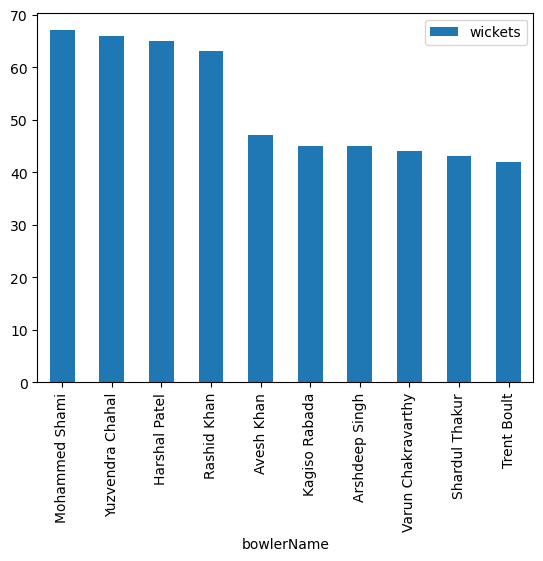

In [75]:
Top_bowlers.head(10).plot(x='bowlerName',y='wickets',kind='bar')

# 5. Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

1. Find minimum of 60 balls bowled bowlers in each season
2. Top 10 average bowling bowlers

In [76]:
# min 60 balls bowled in each season  (60 balls = 10 overs)

# true if sum of overs greater or equal to 10 else false
df3 = BowlingPastYears.groupby(['bowlerName','years'])['overs'].sum().reset_index()

In [77]:
df3

,bowlerName,years,overs
0,Abhishek Sharma,2021,9.0
1,Abhishek Sharma,2022,4.0
2,Abhishek Sharma,2023,12.0
3,Aiden Markram,2021,4.0
4,Aiden Markram,2022,6.0
...,...,...,...
157,Washington Sundar,2022,28.0
158,Washington Sundar,2023,17.4
159,Yuzvendra Chahal,2021,53.0
160,Yuzvendra Chahal,2022,68.0


In [78]:
df3 = df3['bowlerName'][df3['overs']>=10]  # output bowler name whose over greater or equal to 10

In [79]:
df3

2        Abhishek Sharma
6          Andre Russell
7          Andre Russell
8          Andre Russell
9          Anrich Nortje
             ...        
157    Washington Sundar
158    Washington Sundar
159     Yuzvendra Chahal
160     Yuzvendra Chahal
161     Yuzvendra Chahal
Name: bowlerName, Length: 126, dtype: object

In [80]:
df3 = df3.value_counts().reset_index()

In [81]:
#if count less than 3 means not bowled minimum of 10 overs in each season

df3.sample(5)

,bowlerName,count
18,Lalit Yadav,3
36,Tim Southee,2
39,Chetan Sakariya,2
37,T Natarajan,2
20,Khaleel Ahmed,3


In [82]:
# include only bowlers who bowled 60 balls in each season

df3 = df3['bowlerName'][df3['count']==3]

In [83]:
# minimum 60 balls bowled bolwers in each season data

min_bowled = pd.merge(BowlingPastYears,df3, on='bowlerName', how='inner')

$$Bowling Average = \frac {Runs Conceded} {Wickets Taken}$$

In [84]:
Avg_bowling = (min_bowled.groupby('bowlerName')['runs'].sum() / min_bowled.groupby('bowlerName')['wickets'].sum().values).sort_values()

In [85]:
Avg_bowling = Avg_bowling.reset_index().rename(columns={'runs':'Avg_bowling'})

## Result 5

In [86]:
Avg_bowling.head(10)

,bowlerName,Avg_bowling
0,Andre Russell,18.228571
1,Yuzvendra Chahal,20.196970
2,Harshal Patel,20.353846
3,Rashid Khan,20.904762
4,Mohammed Shami,20.970149
5,Avesh Khan,23.723404
6,Kagiso Rabada,23.755556
7,Moeen Ali,23.857143
8,Anrich Nortje,24.774194
9,Umran Malik,26.103448


# 6. Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

Economy rate = Runs Conceded ÷ Overs Bowled 

In [87]:
economy_rate = (min_bowled.groupby('bowlerName')['runs'].sum() / min_bowled.groupby('bowlerName')['overs'].sum().values).sort_values()

In [88]:
economy_rate.sort_index(inplace=True)

## Result 6

In [89]:
# Top 10 bowlers based on economy rate
economy_rate.head(10).sort_values(ascending=True).reset_index()

,bowlerName,runs
0,Axar Patel,7.113636
1,Harpreet Brar,7.609682
2,Bhuvneshwar Kumar,7.877326
3,Anrich Nortje,8.311688
4,Avesh Khan,8.358321
5,Harshal Patel,8.497110
6,Arshdeep Singh,8.634112
7,Jason Holder,9.119683
8,Chris Jordan,10.064516
9,Andre Russell,10.323625


# 7. Top 5 batsmen based on past 3 years boundary % (fours and sixes)

In [90]:
# batsman total of 4s and 6s

df7=batting_data.groupby('batsmanName')[['4s','6s']].sum().reset_index()

In [91]:
# convert 4s to runs

df7['4s'] = df7['4s'].values*4

In [92]:
# convert 6s to runs

df7['6s'] = df7['6s'].values*6

In [93]:
# runs by boundary to calculate percentage boundary for each players

df7['runByboundary'] = df7['4s']+df7['6s']

In [94]:
df7 = pd.merge(df7,top_batsmen,on='batsmanName',how='left')

In [95]:
df7.head()

,batsmanName,4s,6s,runByboundary,runs
0,Abdul Samad,56,114,170,284
1,Abhishek Sharma,328,138,466,745
2,Aiden Markram,220,186,406,775
3,Ajinkya Rahane,156,120,276,467
4,Ambati Rayudu,204,246,450,689


In [96]:
# boundary percentage = (run by boundary / total runs)*100

df7['boundaryPercentage'] = (df7['runByboundary'] / df7['runs']) * 100

In [97]:
top_boundary = df7[['batsmanName','boundaryPercentage']].sort_values(by=['boundaryPercentage'], ascending=False)

## Result 7

In [98]:
top_boundary.head(5)

,batsmanName,boundaryPercentage
9,Avesh Khan,81.481481
5,Andre Russell,75.704698
70,Sunil Narine,75.324675
81,Yashasvi Jaiswal,74.558304
53,Rashid Khan,73.684211


<Axes: xlabel='batsmanName', ylabel='boundaryPercentage'>

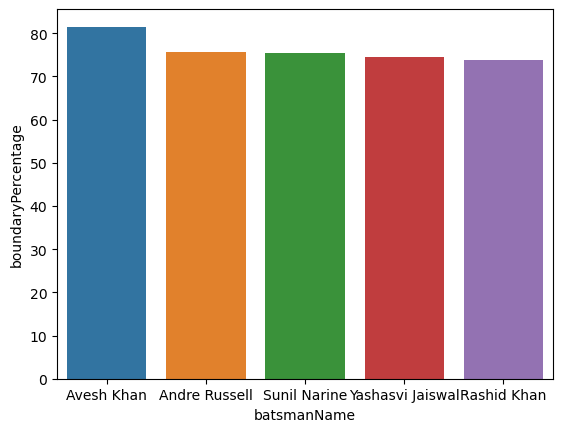

In [99]:
sns.barplot(data=top_boundary.head(5), x='batsmanName', y='boundaryPercentage')

# 8. Top 5 bowlers based on past 3 years dot ball %

In [100]:
BowlingPastYears.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team1,team2,winner,margin,matchDate,years
0,T203817,Super Kings Vs KKR,KKR,Lockie Ferguson,4.0,0,56,0,14.0,4,7,2,2,0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
1,T206442,Capitals Vs KKR,KKR,Lockie Ferguson,4.0,0,26,1,6.5,11,1,2,0,0,Capitals,KKR,KKR,3 wickets,2021-10-13,2021
2,T208597,RCB Vs KKR,KKR,Lockie Ferguson,4.0,0,30,2,7.5,8,4,0,1,0,RCB,KKR,KKR,4 wickets,2021-10-11,2021
3,T204179,KKR Vs Royals,KKR,Lockie Ferguson,4.0,0,18,3,4.5,17,3,0,0,0,KKR,Royals,KKR,86 runs,2021-10-07,2021
4,T206700,Capitals Vs KKR,KKR,Lockie Ferguson,2.0,0,10,2,5.0,6,1,0,0,0,Capitals,KKR,KKR,3 wickets,2021-09-28,2021


In [101]:
df8 = BowlingPastYears

In [102]:
# adding new columns for balls to find % of dot balls

df8['balls'] = BowlingPastYears['overs']*6

In [103]:
# sum of total balls and dot balls for each batsman

df8 = BowlingPastYears.groupby('bowlerName')[['balls','0s']].sum().reset_index()

In [104]:
df8.head()

,bowlerName,balls,0s
0,Abhishek Sharma,150.0,50
1,Aiden Markram,108.6,29
2,Andre Russell,370.8,129
3,Anrich Nortje,554.4,229
4,Arshdeep Singh,847.8,312


In [105]:
# dot ball percentage = (total dot balls / total balls) * 100

df8['dotPercentage'] = (df8['0s'].values / df8['balls'].values)*100


In [106]:
top5_dot_ball = df8.sort_values(by=['dotPercentage'],ascending=False).head(5)

## Result 8

In [107]:
top5_dot_ball.head()

,bowlerName,balls,0s,dotPercentage
29,Mohammed Siraj,918.0,438,47.712418
28,Mohammed Shami,1070.4,510,47.645740
48,Trent Boult,904.8,421,46.529620
49,Umran Malik,486.6,215,44.184135
16,Josh Hazlewood,541.8,239,44.112219


<Axes: xlabel='bowlerName', ylabel='dotPercentage'>

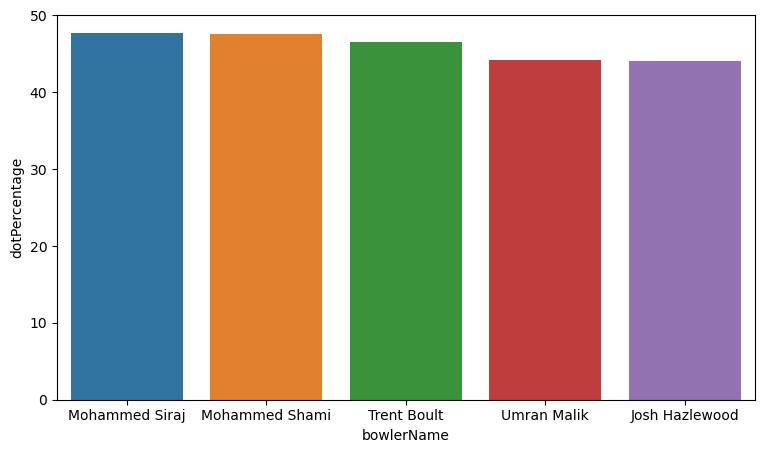

In [108]:
plt.figure(figsize=(9,5))
sns.barplot(data=top5_dot_ball, x='bowlerName', y='dotPercentage')

# 9. Top 4 teams based on past 3 years winning %

Winning% = (total wins / total_match)*100

In [109]:
match

,team1,team2,winner,margin,matchDate,match_id,years
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,2021
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,2021
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,2021
...,...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,2023-04-02,T202485,2023
202,Royals,Sunrisers,Royals,72 runs,2023-04-02,T209117,2023
203,Super Giants,Capitals,Super Giants,50 runs,2023-04-01,T208512,2023
204,Punjab Kings,KKR,Punjab Kings,7 runs,2023-04-01,T202853,2023


**There are two teams in the dataset which joined in 2022 Super Giants and Gujrat Titans so for past three winning percentage they won't be considered.**

In [110]:
m1 = match['team1'].value_counts().sort_index()

In [111]:
m2 = match['team2'].value_counts().sort_index()

In [112]:
# total match played by each team

total_match = m1 + m2

In [113]:
total_match

team1
Capitals        43
KKR             45
Mumbai          44
Punjab Kings    42
RCB             45
Royals          45
Sunrisers       41
Super Giants    29
Super Kings     45
Titans          33
Name: count, dtype: int64

In [114]:
wins = total_match.reset_index()

In [115]:
wins

,team1,count
0,Capitals,43
1,KKR,45
2,Mumbai,44
3,Punjab Kings,42
4,RCB,45
5,Royals,45
6,Sunrisers,41
7,Super Giants,29
8,Super Kings,45
9,Titans,33


In [116]:
# rename columns
wins = wins.rename(columns={'team1':'team', 'count':'total_match'})

In [117]:
# total wins
wins['total_wins'] = match['winner'].value_counts().sort_index().values

In [118]:
wins

,team,total_match,total_wins
0,Capitals,43,21
1,KKR,45,21
2,Mumbai,44,20
3,Punjab Kings,42,19
4,RCB,45,25
5,Royals,45,22
6,Sunrisers,41,13
7,Super Giants,29,17
8,Super Kings,45,25
9,Titans,33,23


In [119]:
# winning percentage = (total wins / total match) * 100

wins['wining%'] = (wins['total_wins'] / wins['total_match'])*100

In [120]:
wins

,team,total_match,total_wins,wining%
0,Capitals,43,21,48.837209
1,KKR,45,21,46.666667
2,Mumbai,44,20,45.454545
3,Punjab Kings,42,19,45.238095
4,RCB,45,25,55.555556
5,Royals,45,22,48.888889
6,Sunrisers,41,13,31.707317
7,Super Giants,29,17,58.620690
8,Super Kings,45,25,55.555556
9,Titans,33,23,69.696970


In [121]:
# excluding Titans and Super Giants they played only two years 2022, 2023

past3_years_team = wins[~wins['team'].isin(['Super Giants', 'Titans'])]

## Result 9

In [122]:
# top 4 teams based on past 3 years winning parcentage
past3_years_team.sort_values(by='wining%',ascending=False).head(4)

,team,total_match,total_wins,wining%
4,RCB,45,25,55.555556
8,Super Kings,45,25,55.555556
5,Royals,45,22,48.888889
0,Capitals,43,21,48.837209


# 10.Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years

- chasing targets is when team bat 2nd and chase the target(total run made by first team).
- Titans and Super Giants is not considered for past 3 years insight because they joined in 2022

In [123]:
match.head()

,team1,team2,winner,margin,matchDate,match_id,years
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,2021
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,2021
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,2021


In [124]:
# team2 are batting 2nd so give me those teams where team2 = winner

chase_team = match.query('team2 == winner')

In [125]:
chase_team

,team1,team2,winner,margin,matchDate,match_id,years
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,2021
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,2021
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,2021
7,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,2021
...,...,...,...,...,...,...,...
194,Mumbai,Super Kings,Super Kings,7 wickets,2023-04-08,T206408,2023
196,Sunrisers,Super Giants,Super Giants,5 wickets,2023-04-07,T209590,2023
199,Capitals,Titans,Titans,6 wickets,2023-04-04,T205026,2023
201,Mumbai,RCB,RCB,8 wickets,2023-04-02,T202485,2023


## Result 10

In [126]:
chase_team['winner'].value_counts().head(2).reset_index()

,winner,count
0,KKR,14
1,Capitals,14


# Prediction

 1. Orange and purple cap player
 2. Top 4 qualifying teams
 3. Winner and runner-up

## Orange cap player

Orange cap batsman = highest run in the season

In [127]:
# highest runs on each year

batting_data.groupby(['batsmanName','years'])[['runs']].sum().sort_values(by='runs',ascending=False).head(5)

,,runs
batsmanName,years,
Shubman Gill,2023,890
Jos Buttler,2022,863
Fafdu Plessis,2023,730
Virat Kohli,2023,639
Ruturaj Gaikwad,2021,635


**Orange cap players past 3 years**
- orange cap 2021 = Ruturaj Gaikwad
- orange cap 2022 = Jos Buttler
- orange cap 2023 = Shubman Gill


Let's explore other features of orange cap batsmen to check whether they have any similarity other than highest runs scored

In [128]:
# Batting Positions

batting_data.groupby('batsmanName')['battingPos'].value_counts().loc[['Ruturaj Gaikwad','Jos Buttler','Shubman Gill']]

batsmanName      battingPos
Ruturaj Gaikwad  1             40
                 2              5
Jos Buttler      2             20
                 1             16
                 3              1
                 4              1
Shubman Gill     2             39
                 1             11
Name: count, dtype: int64

**Insight**
- Orange cap players batting positions (openers) were 1 or 2 

**Strike Rate**

In [129]:
balls = batting_data.groupby(['batsmanName','years'])['balls'].sum().values

In [130]:
#Strike Rate

((batting_data.groupby(['batsmanName','years'])['runs'].sum()/balls) * 100).sort_values(ascending=False).xs(2021,level='years').head(5)

# xs(2021,level='years') --> Put a different year to check, top 5 strike rate of batsmen on that year

batsmanName
Kagiso Rabada      216.666667
Shimron Hetmyer    169.718310
Avesh Khan         166.666667
Prithvi Shaw       162.595420
Jos Buttler        153.012048
Name: runs, dtype: float64

**Insight**
- Strike Rate is independent of orange cap players

**Top 5 Average Batting in each year**

In [131]:
outs = minBallsfaced[minBallsfaced['out/not_out']=='out'].groupby(['batsmanName','years'])['out/not_out'].value_counts().values

In [132]:
#check for top 5 average batting all 3 years

print("2021 Top 5 Average Batting\n",(minBallsfaced.groupby(['batsmanName','years'])['runs'].sum()/ outs).sort_values(ascending=False).xs(2021,level='years').head(5),'\n')
print("2022 Top 5 Average Batting\n",(minBallsfaced.groupby(['batsmanName','years'])['runs'].sum()/ outs).sort_values(ascending=False).xs(2022,level='years').head(5),'\n')
print("2023 Top 5 Average Batting\n",(minBallsfaced.groupby(['batsmanName','years'])['runs'].sum()/ outs).sort_values(ascending=False).xs(2023,level='years').head(5))

2021 Top 5 Average Batting
 batsmanName
Ravindra Jadeja    75.666667
K L Rahul          62.600000
Manish Pandey      48.666667
Ruturaj Gaikwad    45.357143
Fafdu Plessis      45.214286
Name: runs, dtype: float64 

2022 Top 5 Average Batting
 batsmanName
David Miller      68.714286
Jos Buttler       57.533333
Dinesh Karthik    55.000000
K L Rahul         51.333333
David Warner      48.000000
Name: runs, dtype: float64 

2023 Top 5 Average Batting
 batsmanName
Shubman Gill        59.333333
Fafdu Plessis       56.153846
Virat Kohli         53.250000
Yashasvi Jaiswal    48.076923
Suryakumar Yadav    43.214286
Name: runs, dtype: float64


**Insight**
- Average batting of Orange caps players from past years were in top 4

**Top 5 total runs by boundaries**

In [133]:
Boundary_runs = batting_data.groupby(['batsmanName','years'])[['4s','6s']].sum()

In [134]:
Boundary_runs['runByboundary'] = (Boundary_runs['4s']*4)+(Boundary_runs['6s']*6)

In [135]:
# check for top 5 boundary scored in each year

print("2021 Top 5 batsmen runs by boundary \n",Boundary_runs.sort_values(by='runByboundary',ascending=False).xs(2021,level='years').head(5),'\n')
print("2022 Top 5 batsmen runs by boundary \n",Boundary_runs.sort_values(by='runByboundary',ascending=False).xs(2022,level='years').head(5),'\n')
print("2023 Top 5 batsmen runs by boundary \n",Boundary_runs.sort_values(by='runByboundary',ascending=False).xs(2023,level='years').head(5),'\n')

2021 Top 5 batsmen runs by boundary 
                  4s  6s  runByboundary
batsmanName                           
Ruturaj Gaikwad  64  23            394
Fafdu Plessis    60  23            378
K L Rahul        48  30            372
Shikhar Dhawan   60  16            336
Glenn Maxwell    48  21            318 

2022 Top 5 batsmen runs by boundary 
                   4s  6s  runByboundary
batsmanName                            
Jos Buttler       83  45            602
K L Rahul         45  30            360
Sanju Samson      43  26            328
Quintonde Kock    47  23            326
Liam Livingstone  29  34            320 

2023 Top 5 batsmen runs by boundary 
                   4s  6s  runByboundary
batsmanName                            
Shubman Gill      85  33            538
Yashasvi Jaiswal  82  26            484
Fafdu Plessis     60  36            456
Suryakumar Yadav  65  28            428
Ruturaj Gaikwad   46  30            364 



**Insight**
- runs by boundary were highest on the season by orange cap batsmen

**The conditions to select orange cap**

1. highest runs
2. batting position 1 and 2
3. Average batting were in top 4
4. runs by boundary were the highest

Now check past 3 years data based on the above conditions to select Orange Cap batsmen for 2024.

In [136]:
# batting position and Highest runs

batting_data[(batting_data['battingPos']==1)|(batting_data['battingPos']==2)].groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(5)

batsmanName
Shubman Gill       1851
Fafdu Plessis      1831
Ruturaj Gaikwad    1593
K L Rahul          1516
Jos Buttler        1465
Name: runs, dtype: int64

- Batting position 1 or 2
- Total runs from past 3 years highest is ***Shubman Gill*** but ***Faf du Plessis*** is also close

In [137]:
# Average Batting
Avg_Batting.head(5)

,batsmanName,Avg_batting
0,K L Rahul,50.533333
1,Fafdu Plessis,43.595238
2,David Miller,43.200000
3,Jos Buttler,41.916667
4,Shimron Hetmyer,40.666667


From past 3 years batting average of ***KLRahul*** is highest.  
***Faf du Plessis*** is on second highest

In [138]:
# Runs by Boundary

Boundary_runs.groupby('batsmanName')['runByboundary'].sum().sort_values(ascending=False).head(5)

batsmanName
Fafdu Plessis      1108
Shubman Gill       1080
Jos Buttler        1040
Ruturaj Gaikwad     974
K L Rahul           868
Name: runByboundary, dtype: int64

- ***Faf du Plessis*** highest boundary scored from past 3 years

In [139]:
# Batting Position
batting_data.groupby('batsmanName')['battingPos'].value_counts().loc['Fafdu Plessis']

battingPos
2    39
1     7
Name: count, dtype: int64

### Insight 1
- Based on the above conditions Faf du Plessis satisfied 3 conditions.
- 1. Batting position 1 or 2
  2. Top 4 batting average
  3. Highest boundary score
- **Faf du Plessis** more likely to be orange cap based on past 3 years trend

In [140]:
batting_data.head()

,team1,team2,winner,margin,matchDate,match_id,years,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,2021,Super Kings Vs KKR,Super Kings,1,Ruturaj Gaikwad,out,32,27,3,1,118.51
1,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,2021,Capitals Vs Super Kings,Super Kings,1,Ruturaj Gaikwad,out,70,50,5,2,140.00
2,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,2021,Super Kings Vs Punjab Kings,Super Kings,1,Ruturaj Gaikwad,out,12,14,1,0,85.71
3,Super Kings,Capitals,Capitals,3 wickets,2021-10-04,T207682,2021,Super Kings Vs Capitals,Super Kings,1,Ruturaj Gaikwad,out,13,13,2,0,100.00
4,Super Kings,Royals,Royals,7 wickets,2021-10-02,T205672,2021,Super Kings Vs Royals,Super Kings,1,Ruturaj Gaikwad,not_out,101,60,9,5,168.33


## Purple cap player

- Purple cap player = highest wicket taken

In [141]:
# highest wicket taken based on each year

min_bowled.groupby(['bowlerName','years'])['wickets'].sum().sort_values(ascending=False).head(5)

bowlerName        years
Harshal Patel     2021     32
Mohammed Shami    2023     28
Yuzvendra Chahal  2022     27
Rashid Khan       2023     27
Kagiso Rabada     2022     23
Name: wickets, dtype: int64

**Purple cap bowlers :**

2021 = HarshalPatel  
2022 = YuzvendraChahal  
2023 = MohammedShami  

In [142]:
min_bowled.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team1,team2,winner,margin,matchDate,years
0,T203817,Super Kings Vs KKR,KKR,Varun Chakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,2021
1,T206442,Capitals Vs KKR,KKR,Varun Chakravarthy,4.0,0,26,2,6.5,7,2,0,0,1,Capitals,KKR,KKR,3 wickets,2021-10-13,2021
2,T208597,RCB Vs KKR,KKR,Varun Chakravarthy,4.0,0,20,0,5.0,7,0,0,0,0,RCB,KKR,KKR,4 wickets,2021-10-11,2021
3,T204179,KKR Vs Royals,KKR,Varun Chakravarthy,4.0,0,14,1,3.5,16,0,1,0,0,KKR,Royals,KKR,86 runs,2021-10-07,2021
4,T207430,Sunrisers Vs KKR,KKR,Varun Chakravarthy,4.0,0,26,2,6.5,13,0,3,0,0,Sunrisers,KKR,KKR,6 wickets,2021-10-03,2021


**Bowling Strike rate**

In [143]:
# top 5 bowlers' total overs and highest wickets based on past 3 years

top_OW = min_bowled.groupby('bowlerName')[['overs','wickets']].sum().sort_values(by = ['wickets','overs'],ascending=False).head(5)
top_OW

,overs,wickets
bowlerName,,
Mohammed Shami,178.4,67
Yuzvendra Chahal,173.5,66
Harshal Patel,155.7,65
Rashid Khan,182.5,63
Avesh Khan,133.4,47


In [144]:
# Top 5 bowlers' balls and wicket taken average from past 3 years

BS = (top_OW['overs']*6) / top_OW['wickets']
round((BS.reset_index().rename(columns={0:'Bowling Strike Rate'}).sort_values(by='Bowling Strike Rate')),0)

,bowlerName,Bowling Strike Rate
2,Harshal Patel,14.0
1,Yuzvendra Chahal,16.0
0,Mohammed Shami,16.0
4,Avesh Khan,17.0
3,Rashid Khan,17.0


In [145]:
# Average bowling

Avg_bowling.head(5)

,bowlerName,Avg_bowling
0,Andre Russell,18.228571
1,Yuzvendra Chahal,20.196970
2,Harshal Patel,20.353846
3,Rashid Khan,20.904762
4,Mohammed Shami,20.970149


**Top 3 most wicket taken bowlers from past 3 years are :**  
1. MohammedShami  
2. YuzvendraChahal  
3. HarshalPatel  


**Top 3 bowlers balls and wicket taken average from past 3 years (bowling strike rate)**

MohammedShami Average balls to take a wicket:  16  
YuzvendraChahal Average balls to take a wicket:  16  
HarshalPatel Average balls to take a wicket:  14  

### Insight 2

Mostl likely to be Purple cap is **HarshalPatel** due to less average balls to take a wicket based on past 3 years.

## Top 4 qualifying teams

In [146]:
wins.sort_values(by='wining%', ascending=False)

,team,total_match,total_wins,wining%
9,Titans,33,23,69.696970
7,Super Giants,29,17,58.620690
4,RCB,45,25,55.555556
8,Super Kings,45,25,55.555556
5,Royals,45,22,48.888889
0,Capitals,43,21,48.837209
1,KKR,45,21,46.666667
2,Mumbai,44,20,45.454545
3,Punjab Kings,42,19,45.238095
6,Sunrisers,41,13,31.707317


In [147]:
# import additional data of winner teams of each season

import requests

url = 'https://www.crictracker.com/ipl-winners-and-runners-list/' 
html = requests.get(url).content
df_list = pd.read_html(html)   # looks for HTML tables
df = df_list[0] 
df.to_csv('winner_data.csv')


In [148]:
winner = pd.read_csv('winner_data.csv',skiprows=1)
winner

,0,Year,Winner,Won by,Runner Up,Venue
0,1,2024,-,-,-,-
1,2,2023,Chennai Super Kings,5 wickets,Gujarat Titans,Ahmedabad
2,3,2022,Gujarat Titans,7 wickets,Rajasthan Royals,Ahmedabad
3,4,2021,Chennai Super Kings,27 runs,Kolkata Knight Riders,Dubai
4,5,2020,Mumbai Indians,5 wickets,Delhi Capitals,Dubai
5,6,2019,Mumbai Indians,1 run,Chennai Super Kings,Hyderabad
6,7,2018,Chennai Super Kings,8 wickets,Sunrisers Hyderabad,Mumbai
7,8,2017,Mumbai Indians,1 run,Rising Pune Supergiants,Hyderabad
8,9,2016,Sunrisers Hyderabad,8 runs,Royal Challengers Bangalore,Bangalore
9,10,2015,Mumbai Indians,41 runs,Chennai Super Kings,Kolkata


In [149]:
winner.drop([0],axis=0, inplace=True) # remove first row 2024

In [150]:
winner['Winner'].value_counts()

Winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    2
Gujarat Titans           1
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: count, dtype: int64

In [151]:
winner['Runner Up'].value_counts()

Runner Up
Chennai Super Kings            5
Royal Challengers Bangalore    3
Gujarat Titans                 1
Rajasthan Royals               1
Kolkata Knight Riders          1
Delhi Capitals                 1
Sunrisers Hyderabad            1
Rising Pune Supergiants        1
Kings XI Punjab                1
Mumbai Indians                 1
Name: count, dtype: int64

### Insight 3
**Top 4 qualifying team**

**CSK** and **MI**, both with five IPL titles, are strong contenders for the top four. Their consistent success makes them formidable teams.

**Gujrat Titans** has the highest winning percentage in the last 2 years with 1 time IPL title, putting them in a good position for a top-four finish.

**Royals** is on top 5 winnng percentage in the last three years with 1 time IPL titles and runner-up

So based on the data and insight, top 4 qualifying team are most likely to be **CSK, MI, GT and Royals**

## Winner and runner-up

### Insight 4

Looks like **CSK** is in a good spot to win it all with their track record of IPL titles and a solid winning percentage over the last three years.

**GT** seems like a good bet for second place. They came into the league strong in 2022, grabbed a title right away, and even made it to the runner-up spot in 2023. Looks like they've got what it takes to clinch that second spot again.

**Winner : CSK**  
**Runner-up : GT**

# My pick

## Pick your team selecting the Best 11 players based on their positions, 3 years performance data and additional research

### Insight 5

**Openers**

* **KL Rahul (wicket-keeper)**: Highest batting average from the past 3 years. A consistent and technically sound batsman who can also keep wickets effectively.
* **Faf du Plessis**: 2nd highest scorer and batting average from the past 3 years. Adds experience, strong leadership qualities, and solid batting at the top of the order.

**Middle order**

* **Virat Kohli (captain)**: Exceptional batting skills and captaincy experience. A proven performer under pressure, boasting a strong track record.
* **Glenn Maxwell**: Highest strike rate and a top 10 player in most runs scored over the past 3 years. A big-hitting all-rounder who can take the bowling apart on his day.
* **Suryakumar Yadav**: Having good total runs and a healthy strike rate from the past 3 years. A player in great form with a wide range of innovative shots.

**All-rounders**

* **Ravindra Jadeja**: A complete package – a left-arm spinner with good bowling economy, a powerful hitter, and an exceptional fielder.
* **Andre Russell**: Lowest average bowling and highest boundary percentage from the past 3 years. A true match-winner and finisher with explosive batting and powerful bowling.

**Bowlers**

* **Rashid Khan**: A mystery spinner who can restrict runs and pick up crucial wickets.  Maintains a good bowling average and ranks among the top 4 in most wickets taken over the past 3 years.
* **Harshal Patel**: Proven wicket-taker with his variations and slower deliveries. 3rd most wickets taken in the past 3 years. 
* **Mohammed Shami**: Highest wicket-taker with a good dot ball percentage from the past 3 years. A world-class pacer who can take early wickets and restrict scoring.
* **Yuzvendra Chahal**: Another top spinner with 2nd highest wicket taken and 2022 purple cap player.

This team has a strong batting line-up with a good mix of experience, power hitting, and adaptability. The bowling attack is well-balanced with pace, spin, and wicket-taking options. With some exceptional all-rounders in the mix. 

## Pick your top 3 all-rounders

In [152]:
# include only all rounder players
AR_players = players[players['playingRole']=='Allrounder']

In [153]:
AR_players.rename(columns={'name':'batsmanName'},inplace=True)

C:\Users\aly98\AppData\Local\Temp\ipykernel_29520\1333459855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_players.rename(columns={'name':'batsmanName'},inplace=True)


In [154]:
# batting data of all rounder players

AR_batting = pd.merge(batting,AR_players, on='batsmanName',how='inner')

In [155]:
AR_batting.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,KKR,2,Venkatesh Iyer,out,50,32,5,3,156.25,KKR,Left hand Bat,Right arm Medium,Allrounder
1,T206442,Capitals Vs KKR,KKR,2,Venkatesh Iyer,out,55,41,4,3,134.14,KKR,Left hand Bat,Right arm Medium,Allrounder
2,T208597,RCB Vs KKR,KKR,2,Venkatesh Iyer,out,26,30,0,1,86.66,KKR,Left hand Bat,Right arm Medium,Allrounder
3,T204179,KKR Vs Royals,KKR,2,Venkatesh Iyer,out,38,35,3,2,108.57,KKR,Left hand Bat,Right arm Medium,Allrounder
4,T207430,Sunrisers Vs KKR,KKR,2,Venkatesh Iyer,out,8,14,0,0,57.14,KKR,Left hand Bat,Right arm Medium,Allrounder


In [156]:
# Total runs
total_runs = AR_batting.groupby('batsmanName')['runs'].sum()


In [157]:
# Top 10 All-rounders highest runs

total_runs.sort_values(ascending=False).head(10).reset_index()

,batsmanName,runs
0,Hardik Pandya,960
1,Venkatesh Iyer,956
2,Shivam Dube,937
3,Andre Russell,745
4,Abhishek Sharma,745
5,Deepak Hooda,695
6,Ravindra Jadeja,533
7,Krunal Pandya,514
8,Mitchell Marsh,379
9,Vijay Shankar,370


In [158]:
# SR of all-rounders faced a minimum of 60 balls in each season

SR = pd.merge(batting_sr,AR_players, on='batsmanName',how='inner')

In [159]:
SR[['batsmanName','strike_rate']].sort_values(by='strike_rate',ascending=False)

,batsmanName,strike_rate
1,Andre Russell,159.188034
6,Shivam Dube,145.950156
5,Ravindra Jadeja,137.726098
0,Abhishek Sharma,136.446886
3,Hardik Pandya,130.434783
7,Venkatesh Iyer,130.245232
2,Deepak Hooda,127.992634
4,Krunal Pandya,118.981481


In [160]:
# check bowling stats of all rounders. Merge all-rounders players with bowling dataset

AR_players.rename(columns={'batsmanName':'bowlerName'},inplace=True)

C:\Users\aly98\AppData\Local\Temp\ipykernel_29520\3786125718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_players.rename(columns={'batsmanName':'bowlerName'},inplace=True)


In [161]:
AR_bowling = pd.merge(bowling,AR_players,on='bowlerName',how='inner')

In [162]:
AR_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,KKR,Shakib Al Hasan,3.0,0,33,0,11.0,6,2,3,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder
1,T206442,Capitals Vs KKR,KKR,Shakib Al Hasan,4.0,0,28,0,7.0,9,2,1,1,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder
2,T208597,RCB Vs KKR,KKR,Shakib Al Hasan,4.0,0,24,0,6.0,6,2,0,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder
3,T204179,KKR Vs Royals,KKR,Shakib Al Hasan,1.0,0,1,1,1.0,5,0,0,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder
4,T207430,Sunrisers Vs KKR,KKR,Shakib Al Hasan,4.0,0,20,1,5.0,10,0,1,0,0,KKR,Left hand Bat,Slow Left arm Orthodox,Allrounder


In [163]:
AR_bowling.groupby('bowlerName').agg({'wickets':'sum', 'economy':'mean'}).sort_values(by='wickets', ascending=False).reset_index().head(10)

,bowlerName,wickets,economy
0,Ravindra Jadeja,37,7.824390
1,Wanindu Hasaranga,35,8.310385
2,Andre Russell,35,10.614333
3,Dwayne Bravo,30,8.616190
4,Krunal Pandya,24,8.322778
5,Sam Curran,19,10.173043
6,Mitchell Marsh,16,9.165000
7,Daniel Sams,14,8.589231
8,Shahbaz Ahmed,12,10.075600
9,Hardik Pandya,11,8.409524


### Insight 6

**On past 3 years all rounder performance my top 3 pick are the following :**

1. **Ravindra Jadeja**:
    - Batting: He has scored **533 runs** at a **strike rate of 137**.
    - Bowling: He has taken **37 wickets** with an **economy rate of 7.82** top wickets taker and with well economy rate among all-rounders.
    - Jadeja's consistent contributions with both bat and ball make him a strong all-rounder.

2. **Andre Russell**:
    - Batting: Russell has scored **745 runs** at a **strike rate of 159** highest strike rate among all-rounders and 2nd highest boundary  percentage among all players (who faced 60 balls in each season).
    - Bowling: He has also taken **35 wickets**, with a lowest bowling average among all players but his economy rate is higher at **10.61**.
    - Russell's explosive batting and ability to pick up wickets make him a valuable asset.

3. **Hardik Pandya**:
    - Batting: Hardik Pandya has scored highest runs **960 runs** at a **strike rate of 130**.
    - Bowling: He has taken **11 wickets** with an economy rate of **8.41**, and he is top 9 highest wicket taken from past 3 years among all rounders.
    - While his bowling stats are not as impressive, Pandya's aggressive batting compensates for it.

# New data for visualization

In [164]:
top_batsmen.shape

(82, 2)

In [165]:
data1 = top_batsmen.copy()

In [166]:
data1 = pd.merge(data1,Avg_Batting,on='batsmanName',how='left')

In [167]:
data1 = pd.merge(data1,batting_sr,on='batsmanName',how='left')

In [168]:
data1 = pd.merge(data1,top_boundary,on='batsmanName',how='left')

In [169]:
data1.head()

,batsmanName,runs,Avg_batting,strike_rate,boundaryPercentage
0,Shubman Gill,1851,40.239130,139.068370,58.346840
1,Fafdu Plessis,1831,43.595238,140.846154,60.513381
2,Ruturaj Gaikwad,1593,37.928571,137.683665,61.142498
3,K L Rahul,1516,50.533333,132.055749,57.255937
4,Jos Buttler,1509,41.916667,146.932814,68.919814


In [170]:
data2 = Top_bowlers.copy()

In [171]:
data2 = pd.merge(data2,Avg_bowling, on='bowlerName', how='left')

In [172]:
data2 = pd.merge(data2,economy_rate, on='bowlerName', how='left')

In [173]:
data2 = pd.merge(data2,df8, on='bowlerName', how='left')

In [174]:
data2.head()

,bowlerName,wickets,Avg_bowling,runs,balls,0s,dotPercentage
0,Mohammed Shami,67,20.970149,7.875561,1070.4,510,47.645740
1,Yuzvendra Chahal,66,20.196970,7.682997,1041.0,361,34.678194
2,Harshal Patel,65,20.353846,8.497110,934.2,339,36.287733
3,Rashid Khan,63,20.904762,7.216438,1095.0,384,35.068493
4,Avesh Khan,47,23.723404,8.358321,800.4,334,41.729135


In [175]:
team = wins.copy()

In [176]:
ct_winner = chase_team[['team2','winner']]

In [177]:
ct_winner = ct_winner.winner.value_counts().reset_index().rename(columns={'winner':'team','count':'chasing_team_wins'})

In [178]:
ct_winner.head()

,team,chasing_team_wins
0,KKR,14
1,Capitals,14
2,Titans,14
3,Mumbai,13
4,Super Kings,11


In [179]:
teams = pd.merge(team,ct_winner,on ='team', how ='left')

In [180]:
teams

,team,total_match,total_wins,wining%,chasing_team_wins
0,Capitals,43,21,48.837209,14
1,KKR,45,21,46.666667,14
2,Mumbai,44,20,45.454545,13
3,Punjab Kings,42,19,45.238095,8
4,RCB,45,25,55.555556,10
5,Royals,45,22,48.888889,9
6,Sunrisers,41,13,31.707317,9
7,Super Giants,29,17,58.620690,5
8,Super Kings,45,25,55.555556,11
9,Titans,33,23,69.696970,14


In [181]:
with pd.ExcelWriter('IPL_Data.xlsx') as writer:
    data1.to_excel(writer,'batting',index=False)
    data2.to_excel(writer,'bowling',index=False)
    teams.to_excel(writer,'teams',index=False)